In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)

In [5]:
#load data
churn=pd.read_csv('churn_data.csv')
customer=pd.read_csv('customer_data.csv')
internet=pd.read_csv('internet_data.csv')

In [6]:
churn.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [8]:
internet.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [9]:
#merge churn and customer based on customerID
df1=pd.merge(churn,customer,how='inner',on='customerID')

In [11]:
#merge df1 and internet
telecom=pd.merge(df1,internet,how='inner',on='customerID')

In [16]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


# Data Preparation

In [13]:
telecom.nunique()

customerID          7043
tenure                73
PhoneService           2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
dtype: int64

In [17]:
binary_vars=['PhoneService','Churn','PaperlessBilling','Partner','Dependents']

In [18]:
telecom[binary_vars]

,PhoneService,Churn,PaperlessBilling,Partner,Dependents
0,No,No,Yes,Yes,No
1,Yes,No,No,No,No
2,Yes,Yes,Yes,No,No
3,No,No,No,No,No
4,Yes,Yes,Yes,No,No
5,Yes,Yes,Yes,No,No
6,Yes,No,Yes,No,Yes
7,No,No,No,No,No
8,Yes,Yes,Yes,Yes,No
9,Yes,No,No,No,Yes


In [19]:
#convert yes no to 1 and 0
#function to apply
def binary_map(x):
    return x.map({'Yes':1,'No':0})

In [20]:
telecom[binary_vars]=telecom[binary_vars].apply(binary_map)

In [22]:
telecom[binary_vars].head()

,PhoneService,Churn,PaperlessBilling,Partner,Dependents
0,0,0,1,1,0
1,1,0,0,0,0
2,1,1,1,0,0
3,0,0,0,0,0
4,1,1,1,0,0


In [23]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [24]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [26]:
#get list of categorical columns
cat_cols= telecom.select_dtypes(include='object').columns.to_list()

In [27]:
cat_cols

['customerID',
 'Contract',
 'PaymentMethod',
 'TotalCharges',
 'gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [29]:
cat_cols.remove('customerID')
cat_cols.remove('TotalCharges')

In [30]:
cat_cols

['Contract',
 'PaymentMethod',
 'gender',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies']

In [31]:
#check unique values in each columns
for x in cat_cols:
    lst=telecom[x].unique()
    print("Column Name: ",x)
    print("Unique Values:",*lst)
    lst=[]

Column Name:  Contract
Unique Values: Month-to-month One year Two year
Column Name:  PaymentMethod
Unique Values: Electronic check Mailed check Bank transfer (automatic) Credit card (automatic)
Column Name:  gender
Unique Values: Female Male
Column Name:  MultipleLines
Unique Values: No phone service No Yes
Column Name:  InternetService
Unique Values: DSL Fiber optic No
Column Name:  OnlineSecurity
Unique Values: No Yes No internet service
Column Name:  OnlineBackup
Unique Values: Yes No No internet service
Column Name:  DeviceProtection
Unique Values: No Yes No internet service
Column Name:  TechSupport
Unique Values: No Yes No internet service
Column Name:  StreamingTV
Unique Values: No Yes No internet service
Column Name:  StreamingMovies
Unique Values: No Yes No internet service


We are going to create dummy variables for the categorical vars.

For variables having Yes, No, No Internet Services, we are not going to drop the first column. Rathe we'd drop the No service column after dummy is created

In [32]:
#create dummy variables
dummy1=pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)

In [34]:
telecom=pd.concat([telecom,dummy1],axis=1)

In [35]:
telecom.drop(columns=['Contract','PaymentMethod','gender','InternetService'],inplace=True)

In [36]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,No phone service,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,No,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,No,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,No phone service,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,No,No,No,No,No,No,No,0,0,0,1,0,0,1,0


In [37]:
dummy2=pd.get_dummies(telecom[['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']])

In [43]:
no_cols =[x for x in dummy2.columns[dummy2.columns.str.contains('No')]]

In [44]:
no_cols

['MultipleLines_No',
 'MultipleLines_No phone service',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'TechSupport_No',
 'TechSupport_No internet service',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingMovies_No',
 'StreamingMovies_No internet service']

In [47]:
no_service_cols =[x for x in no_cols if "service" in x]

In [48]:
no_service_cols

['MultipleLines_No phone service',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service']

In [49]:
dummy2.drop(columns=no_service_cols,inplace=True)

In [50]:
telecom=pd.concat([telecom,dummy2],axis=1)

In [51]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,No phone service,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,No,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,No,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,No phone service,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,No,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [52]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  MultipleLines                          7043 non-null   object 
 11  Onli

In [53]:
telecom.drop(columns=['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],inplace=True)

In [54]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [55]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [56]:
#The varaible was imported as a string we need to convert it to float
telecom['TotalCharges'] = telecom['TotalCharges']._convert(numeric=True)

In [57]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [58]:
#list of numeric variables
num_telecom = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [59]:
num_telecom.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [60]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


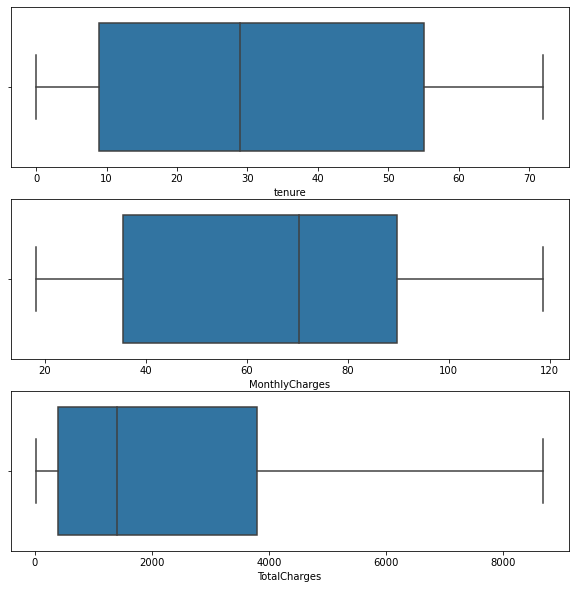

In [61]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.boxplot(num_telecom['tenure'],orient="h")
plt.subplot(3,1,2)
sns.boxplot(num_telecom['MonthlyCharges'],orient="h")
plt.subplot(3,1,3)
sns.boxplot(num_telecom['TotalCharges'],orient="h")
plt.show()

From the above, it can be seen that there are no outlier in the numeric columns

In [63]:
#check for null values

telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [64]:
#check for null values

round((telecom.isnull().sum()/len(telecom.index))*100,2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [65]:
# Removing NaN TotalCharges rows
telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [66]:
#check for null values

round((telecom.isnull().sum()/len(telecom.index))*100,2)

customerID                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No                         0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [67]:
#separate X and Y variable
X=telecom.drop(['customerID','Churn'],axis=1)
y=telecom['Churn']

In [69]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [70]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [71]:
#create a correlation matrix
corr_mat=X.corr()

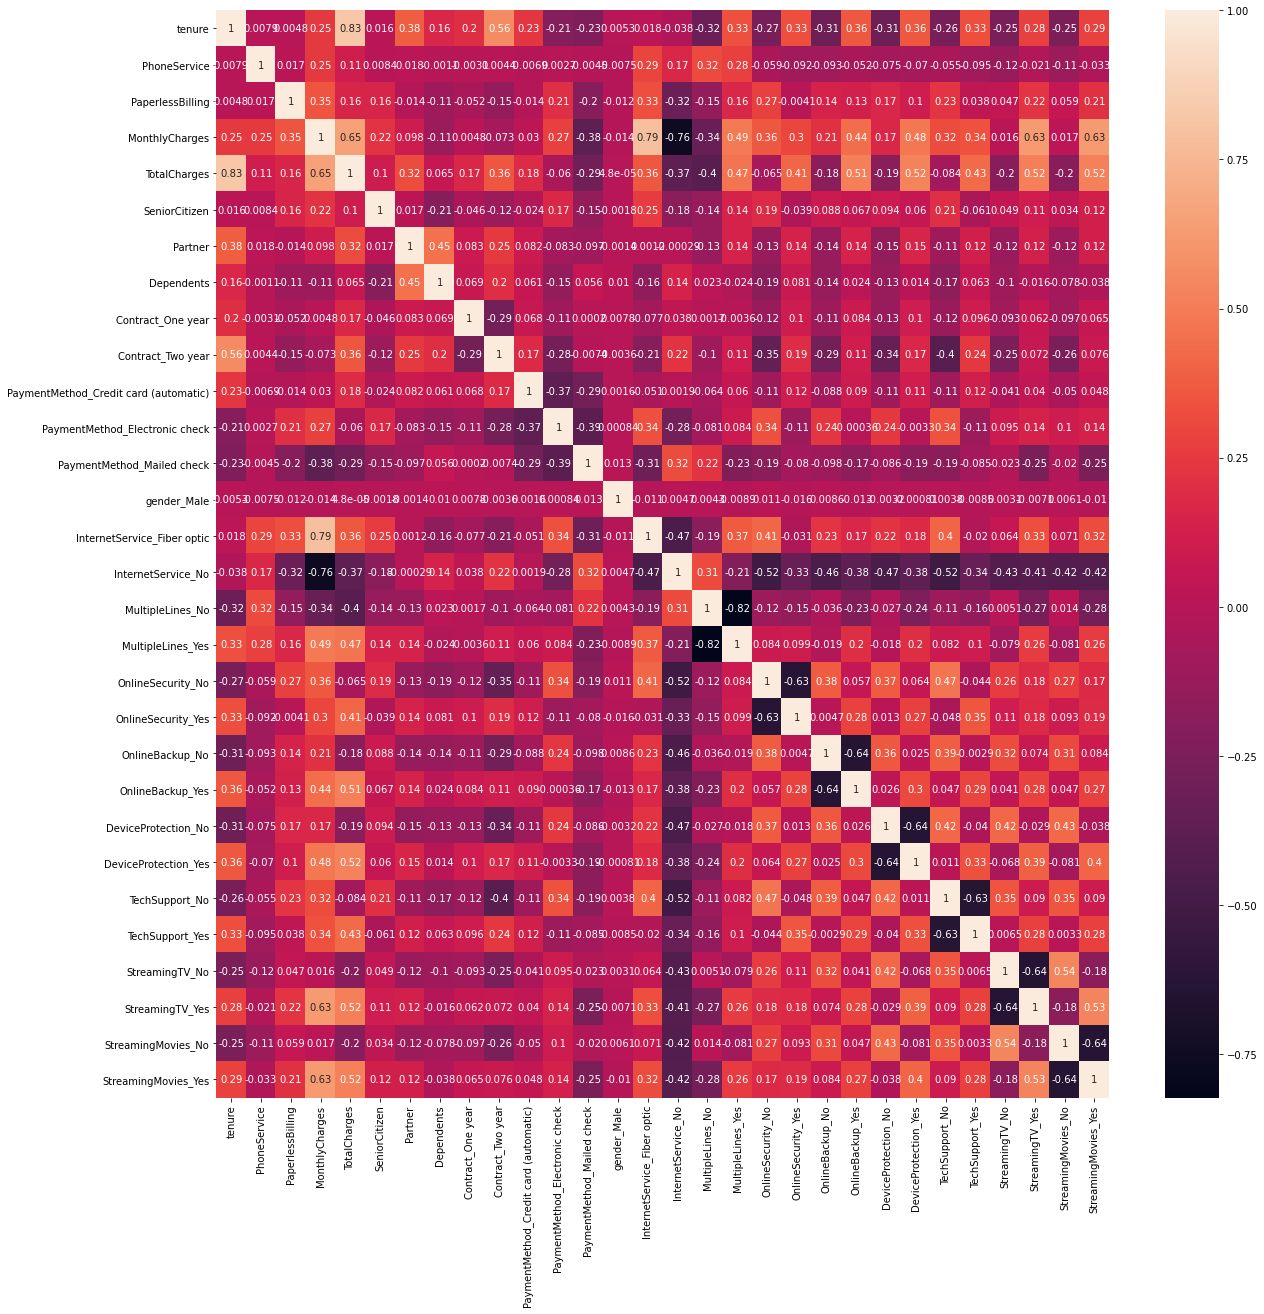

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True)
plt.show()

In [75]:
#dropping highly correlated variables
X=X.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'],1)

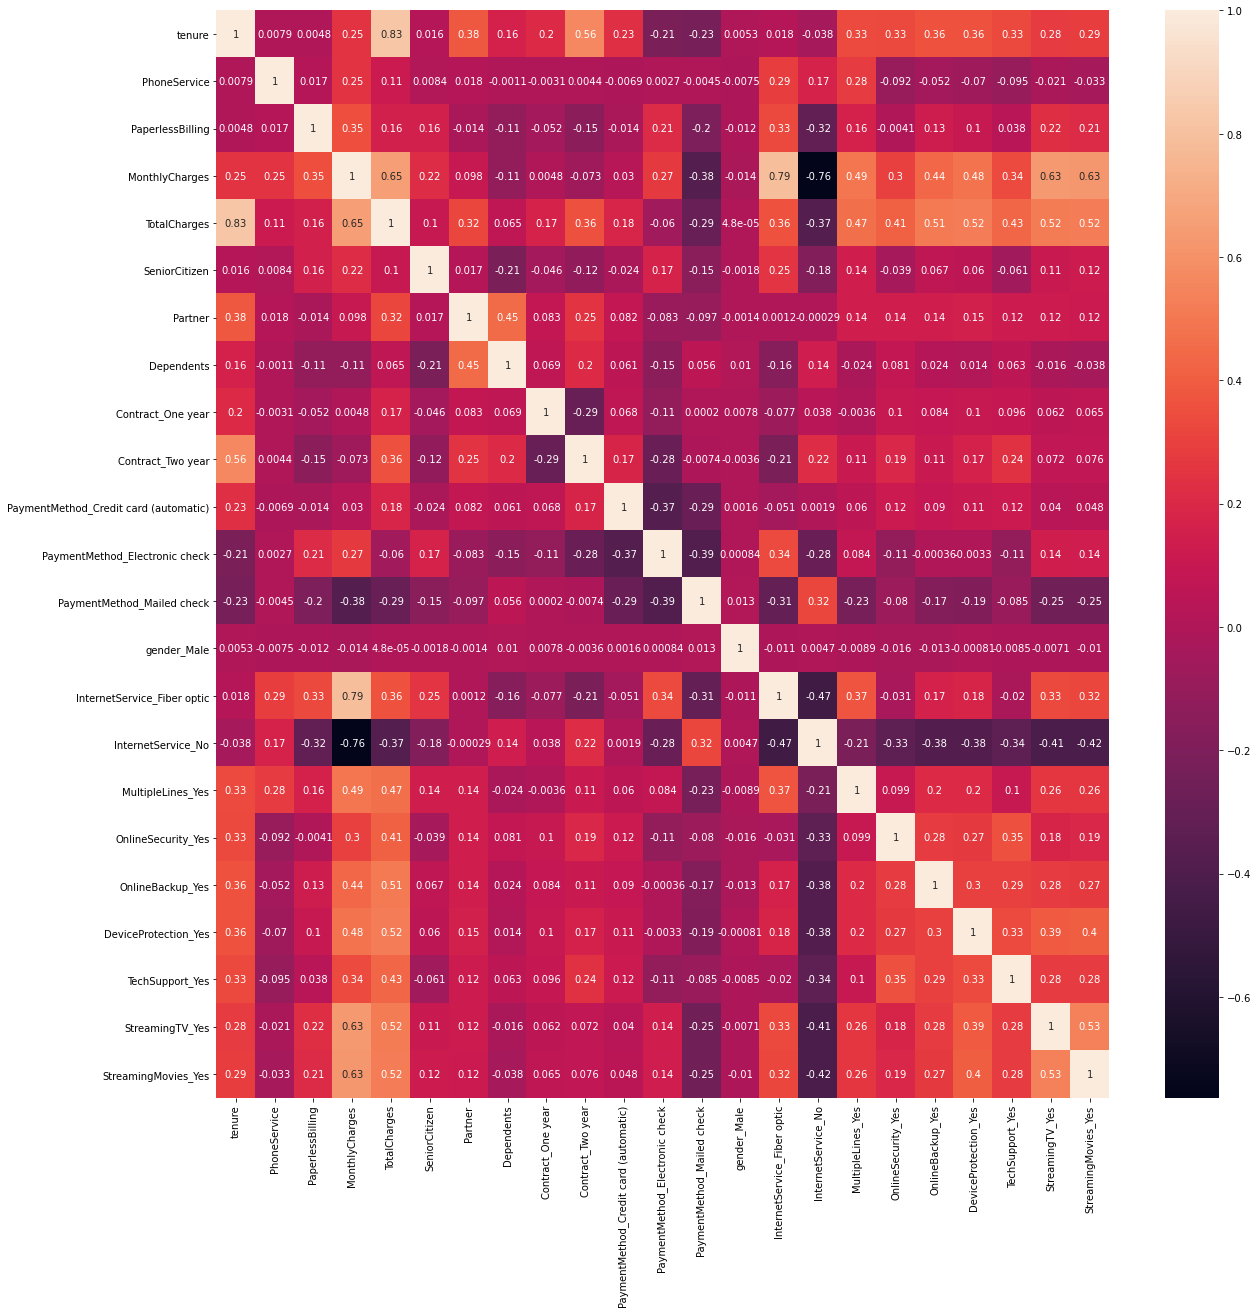

In [76]:
#create a correlation matrix
corr_mat=X.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True)
plt.show()

# Train Test Split

In [77]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [82]:
X_train.shape

(4922, 23)

In [83]:
y_train.shape

(4922,)

In [84]:
X_test.shape

(2110, 23)

In [85]:
y_test.shape

(2110,)

# Scaling the data

In [86]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [87]:
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

In [88]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
5790,0.305384,0,1,-0.464443,-0.112702,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1
6498,-1.286319,1,1,0.581425,-0.974430,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0
880,-0.919003,1,1,1.505913,-0.550676,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1
2784,-1.163880,1,1,1.106854,-0.835971,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1


In [89]:
### Checking the Churn Rate
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100
churn

26.578498293515356

# Logistic Regression 

In [92]:
import statsmodels.api as sm

In [93]:
#add constant for sm model
X_train_sm=sm.add_constant(X_train)

In [95]:
# Logistic regression model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Thu, 29 Sep 2022   Deviance:                       4009.4
Time:                        13:02:26   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

# Feature Selection using RFE

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [97]:
logreg=LogisticRegression()

In [98]:
rfe=RFE(logreg,n_features_to_select=15)

In [99]:
rfe=rfe.fit(X_train,y_train)

In [100]:
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [101]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True,  True, False,  True, False,  True,  True,  True, False,
       False, False,  True,  True,  True])

In [102]:
rfe_df=pd.DataFrame({'Var':X_train.columns,'Selection_Index':rfe.support_,'Ranking':rfe.ranking_})

In [105]:
rfe_df.sort_values('Ranking',ascending=True)

,Var,Selection_Index,Ranking
0,tenure,True,1
20,TechSupport_Yes,True,1
16,MultipleLines_Yes,True,1
15,InternetService_No,True,1
14,InternetService_Fiber optic,True,1
12,PaymentMethod_Mailed check,True,1
21,StreamingTV_Yes,True,1
10,PaymentMethod_Credit card (automatic),True,1
9,Contract_Two year,True,1
22,StreamingMovies_Yes,True,1


In [106]:
col=X_train.columns[rfe.support_]

In [107]:
X_train_rfe=X_train[col]

In [108]:
X_train_sm=sm.add_constant(X_train_rfe)

In [110]:
# Logistic regression model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Thu, 29 Sep 2022   Deviance:                       4022.2
Time:                        13:07:09   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

In [112]:
#predicting on training set
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

879     0.192642
5790    0.275624
6498    0.599507
880     0.513571
2784    0.648233
3874    0.414846
5387    0.431184
6623    0.801788
4465    0.228194
5364    0.504575
dtype: float64

In [113]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19264205, 0.27562384, 0.59950707, 0.51357126, 0.64823272,
       0.41484553, 0.43118361, 0.80178789, 0.22819404, 0.50457542])

In [114]:
y_train_pred_final=pd.DataFrame({'CustID':y_train.index,'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,CustID,Churn,Churn_Prob
0,879,0,0.192642
1,5790,0,0.275624
2,6498,1,0.599507
3,880,1,0.513571
4,2784,1,0.648233


In [115]:
#Creating a new column having 1 if churn_prob>0.5 else 0
y_train_pred_final['predicted']=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,879,0,0.192642,0
1,5790,0,0.275624,0
2,6498,1,0.599507,1
3,880,1,0.513571,1
4,2784,1,0.648233,1


In [116]:
#evaluating the model
from sklearn import metrics
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
print(confusion)

[[3275  360]
 [ 574  713]]


In [117]:
#check accuracy of model
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8102397399431126


# Checking VIF

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,MonthlyCharges,14.85
3,TotalCharges,10.42
0,tenure,7.38
9,InternetService_Fiber optic,5.61
10,InternetService_No,5.27
6,Contract_Two year,3.14
13,StreamingTV_Yes,2.79
14,StreamingMovies_Yes,2.79
1,PaperlessBilling,2.76
11,MultipleLines_Yes,2.38


In [120]:
#drop column with high VIF
X_train_rfe.drop(columns='MonthlyCharges',inplace=True)

In [121]:
X_train_rfe.head()

,tenure,PaperlessBilling,TotalCharges,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,MultipleLines_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
879,0.019693,1,-0.276449,0,0,0,0,0,0,0,1,0,0,0
5790,0.305384,1,-0.112702,0,0,0,0,0,0,0,0,0,1,1
6498,-1.286319,1,-0.974430,0,0,0,0,0,1,0,0,0,0,0
880,-0.919003,1,-0.550676,0,0,0,0,0,1,0,0,1,1,1
2784,-1.163880,1,-0.835971,0,0,0,0,0,1,0,0,1,1,1


In [122]:
X_train_sm=sm.add_constant(X_train_rfe)

In [123]:
# Logistic regression model
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Thu, 29 Sep 2022   Deviance:                       4046.2
Time:                        13:41:34   Pearson chi2:                 5.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5971      0.130    -12.296      0.000      -1.852      -1.343
tenure                                   -1.3286      0.180     -7.401      0.000      -1.681      -0.977
PaperlessBilling                          0.3533      0.089      3.958      0.000       0.178       0.528
TotalCharges                              0.4347      0.186      2.340      0.019       0.071       0.799
SeniorCitizen                             0.4569      0.099      4.601      0.000       0.262       0.652
Contract_One year                        -0.7289      0.127     -5.729      0.000      -0.978      -0.480
Contract_Two year                        -1.3277      0.210     -6.322      0.000      -1.739      -0.916
PaymentMethod_Credit card (automatic)    -0.3870      0.112     -3.442      0.001      -0.607      -0.167
PaymentMethod_Mailed check               -0.3618      0.110     -3.274      0.001      -0.578      -0.145
InternetService_Fiber optic               0.6888      0.109      6.297      0.000       0.474       0.903
InternetService_No                       -0.9555      0.156     -6.120      0.000      -1.262      -0.649
MultipleLines_Yes                         0.1700      0.094      1.814      0.070      -0.014       0.354
TechSupport_Yes                          -0.4371      0.101     -4.307      0.000      -0.636      -0.238
StreamingTV_Yes                           0.2881      0.096      2.996      0.003       0.100       0.477
StreamingMovies_Yes                       0.1944      0.096      2.031      0.042       0.007       0.382
=========================================================================================================
"""

In [124]:
X_train_rfe.drop(columns='MultipleLines_Yes',inplace=True)

In [125]:
X_train_sm=sm.add_constant(X_train_rfe)

In [126]:
# Logistic regression model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2024.8
Date:                Thu, 29 Sep 2022   Deviance:                       4049.5
Time:                        13:43:17   Pearson chi2:                 5.88e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5390      0.126    -12.238      0.000      -1.785      -1.293
tenure                                   -1.3489      0.179     -7.527      0.000      -1.700      -0.998
PaperlessBilling                          0.3602      0.089      4.037      0.000       0.185       0.535
TotalCharges                              0.4932      0.183      2.697      0.007       0.135       0.852
SeniorCitizen                             0.4655      0.099      4.701      0.000       0.271       0.660
Contract_One year                        -0.7459      0.127     -5.877      0.000      -0.995      -0.497
Contract_Two year                        -1.3430      0.210     -6.392      0.000      -1.755      -0.931
PaymentMethod_Credit card (automatic)    -0.3864      0.112     -3.440      0.001      -0.607      -0.166
PaymentMethod_Mailed check               -0.3703      0.110     -3.353      0.001      -0.587      -0.154
InternetService_Fiber optic               0.7172      0.108      6.615      0.000       0.505       0.930
InternetService_No                       -0.9545      0.156     -6.110      0.000      -1.261      -0.648
TechSupport_Yes                          -0.4426      0.101     -4.365      0.000      -0.641      -0.244
StreamingTV_Yes                           0.2868      0.096      2.983      0.003       0.098       0.475
StreamingMovies_Yes                       0.1935      0.096      2.023      0.043       0.006       0.381
=========================================================================================================
"""

In [127]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,TotalCharges,7.35
0,tenure,6.90
5,Contract_Two year,3.05
8,InternetService_Fiber optic,2.70
12,StreamingMovies_Yes,2.61
11,StreamingTV_Yes,2.59
1,PaperlessBilling,2.49
9,InternetService_No,2.40
10,TechSupport_Yes,1.95
4,Contract_One year,1.79


In [128]:
#Dropping col with high VIF
X_train_rfe.drop(columns='TotalCharges',inplace=True)

In [129]:
X_train_sm=sm.add_constant(X_train_rfe)

In [130]:
# Logistic regression model
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4909
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2028.5
Date:                Thu, 29 Sep 2022   Deviance:                       4057.1
Time:                        13:44:42   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5953      0.123    -12.944      0.000      -1.837      -1.354
tenure                                   -0.9025      0.062    -14.475      0.000      -1.025      -0.780
PaperlessBilling                          0.3528      0.089      3.959      0.000       0.178       0.527
SeniorCitizen                             0.4711      0.099      4.741      0.000       0.276       0.666
Contract_One year                        -0.7415      0.126     -5.874      0.000      -0.989      -0.494
Contract_Two year                        -1.3118      0.208     -6.303      0.000      -1.720      -0.904
PaymentMethod_Credit card (automatic)    -0.3867      0.112     -3.439      0.001      -0.607      -0.166
PaymentMethod_Mailed check               -0.3362      0.110     -3.070      0.002      -0.551      -0.122
InternetService_Fiber optic               0.8626      0.094      9.169      0.000       0.678       1.047
InternetService_No                       -0.9718      0.155     -6.257      0.000      -1.276      -0.667
TechSupport_Yes                          -0.4058      0.101     -4.032      0.000      -0.603      -0.208
StreamingTV_Yes                           0.3458      0.094      3.695      0.000       0.162       0.529
StreamingMovies_Yes                       0.2496      0.093      2.675      0.007       0.067       0.432
=========================================================================================================
"""

In [131]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Contract_Two year,2.97
11,StreamingMovies_Yes,2.53
10,StreamingTV_Yes,2.50
1,PaperlessBilling,2.41
7,InternetService_Fiber optic,2.33
8,InternetService_No,2.01
0,tenure,1.97
9,TechSupport_Yes,1.92
3,Contract_One year,1.78
6,PaymentMethod_Mailed check,1.63


In [132]:
#predicting on training set
y_train_pred=res.predict(X_train_sm)
y_train_pred=y_train_pred.values.reshape(-1)
#df with actual v predicted
y_train_pred_final=pd.DataFrame({'CustID':y_train.index,'Churn':y_train.values,'Churn_Prob':y_train_pred})
#select based on predicted
y_train_pred_final['Predicted']=y_train_pred_final['Churn_Prob'].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final.head()

,CustID,Churn,Churn_Prob,Predicted
0,879,0,0.220918,0
1,5790,0,0.284383,0
2,6498,1,0.685902,1
3,880,1,0.654550,1
4,2784,1,0.702684,1


In [133]:
print("Confusion Matrix: \n")
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.Predicted)
print(confusion)

print("Accuracy: \n")

#check accuracy of model
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

Confusion Matrix: 

[[3270  365]
 [ 604  683]]
Accuracy: 

0.8031288094270622


# Metrics Beyond Accuracy

In [134]:
print("Confusion Matrix: \n")
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.Predicted)
print(confusion)

print("Accuracy: \n")

#check accuracy of model
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

Confusion Matrix: 

[[3270  365]
 [ 604  683]]
Accuracy: 

0.8031288094270622


In [135]:
# Actual/Predicted     not_churn    churn
        # not_churn        3270      365
        # churn            604        683  

In [136]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [137]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5306915306915307

In [138]:
# Let us calculate specificity
TN / float(TN+FP)

0.8995873452544704

In [139]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10041265474552957


In [140]:
# positive predictive value 
print (TP / float(TP+FP))

0.6517175572519084


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8440887971089314


In [142]:
fpr, tpr, thresholds=metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [143]:
auc_score = metrics.roc_auc_score( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob )

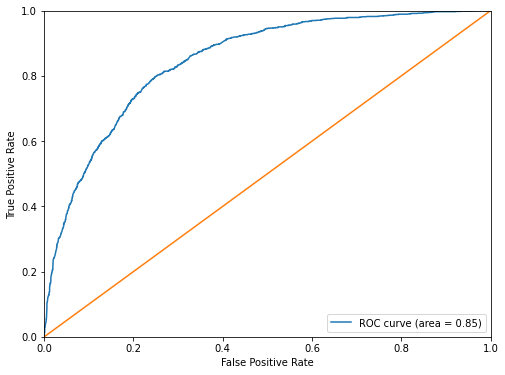

In [144]:
#plot AUC ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Finding the optimal cutoff

In [145]:
numbers=[float(x)/10 for x in range(10)]

In [146]:
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final['Churn_Prob'].map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,CustID,Churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,879,0,0.220918,0,1,1,1,0,0,0,0,0,0,0
1,5790,0,0.284383,0,1,1,1,0,0,0,0,0,0,0
2,6498,1,0.685902,1,1,1,1,1,1,1,1,0,0,0
3,880,1,0.654550,1,1,1,1,1,1,1,1,0,0,0
4,2784,1,0.702684,1,1,1,1,1,1,1,1,1,0,0


In [147]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df=pd.DataFrame(columns=['Probability','Accuracy','Sensitivity','Specificity'])

for i in numbers:
    cm1=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final[i])
    TP = cm1[1,1] # true positive 
    TN = cm1[0,0] # true negatives
    FP = cm1[0,1] # false positives
    FN = cm1[1,0] # false negatives
    total=sum(sum(cm1))
    acc= ((TP+TN)/total)
    sensitivity=TP/float(TP+FN)
    specificity=TN /float(TN+FP)
    
    cutoff_df.loc[i]=[i,acc,sensitivity,specificity]

In [148]:
cutoff_df

,Probability,Accuracy,Sensitivity,Specificity
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.617838,0.944833,0.502063
0.2,0.2,0.723283,0.850039,0.678404
0.3,0.3,0.769200,0.776224,0.766713
0.4,0.4,0.790532,0.635587,0.845392
0.5,0.5,0.803129,0.530692,0.899587
0.6,0.6,0.800284,0.388500,0.946080
0.7,0.7,0.776920,0.193473,0.983494
0.8,0.8,0.745835,0.034188,0.997799
0.9,0.9,0.738521,0.000000,1.000000


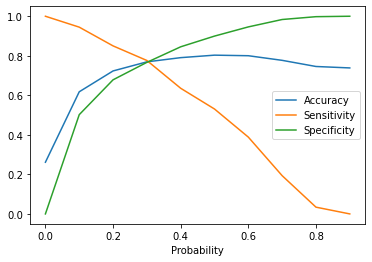

In [149]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [150]:
y_train_pred_final['final_predicted']=y_train_pred_final['Churn_Prob'].map(lambda x:1 if x>0.3 else 0)

In [151]:
y_train_pred_final

,CustID,Churn,Churn_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,879,0,0.220918,0,1,1,1,0,0,0,0,0,0,0,0
1,5790,0,0.284383,0,1,1,1,0,0,0,0,0,0,0,0
2,6498,1,0.685902,1,1,1,1,1,1,1,1,0,0,0,1
3,880,1,0.654550,1,1,1,1,1,1,1,1,0,0,0,1
4,2784,1,0.702684,1,1,1,1,1,1,1,1,1,0,0,1
5,3874,0,0.407024,0,1,1,1,1,1,0,0,0,0,0,1
6,5387,0,0.278753,0,1,1,1,0,0,0,0,0,0,0,0
7,6623,1,0.777660,1,1,1,1,1,1,1,1,1,0,0,1
8,4465,0,0.208693,0,1,1,1,0,0,0,0,0,0,0,0
9,5364,1,0.504431,1,1,1,1,1,1,1,0,0,0,0,1


In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7691995123933361

In [153]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[2787,  848],
       [ 288,  999]], dtype=int64)

In [154]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7762237762237763

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.7667125171939477

In [157]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23328748280605227


In [158]:
# Positive predictive value 
print (TP / float(TP+FP))

0.5408770979967515


In [159]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9063414634146342


# Precision Recall

In [166]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
confusion

array([[3270,  365],
       [ 604,  683]], dtype=int64)

##### Precision
TP / TP + FP

In [167]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6517175572519084

##### Recall
TP / TP + FN

In [168]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5306915306915307

In [169]:
from sklearn.metrics import precision_score, recall_score

In [170]:
precision_score(y_train_pred_final.Churn, y_train_pred_final.Predicted)

0.6517175572519084

In [171]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.Predicted)

0.5306915306915307

### Precision and recall tradeoff

In [172]:
from sklearn.metrics import precision_recall_curve

In [173]:
y_train_pred_final.Churn, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
 5       0
 6       0
 7       1
 8       0
 9       1
 10      0
 11      1
 12      1
 13      0
 14      0
 15      0
 16      0
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      0
 26      0
 27      0
 28      0
 29      0
 30      0
 31      1
 32      0
 33      1
 34      0
 35      0
 36      1
 37      1
 38      0
 39      0
 40      1
 41      1
 42      0
 43      0
 44      0
 45      1
 46      0
 47      0
 48      1
 49      1
        ..
 4872    1
 4873    1
 4874    0
 4875    0
 4876    0
 4877    1
 4878    0
 4879    0
 4880    0
 4881    0
 4882    1
 4883    0
 4884    1
 4885    0
 4886    0
 4887    0
 4888    0
 4889    1
 4890    0
 4891    0
 4892    1
 4893    1
 4894    0
 4895    0
 4896    0
 4897    0
 4898    0
 4899    0
 4900    0
 4901    1
 4902    0
 4903    1
 4904    0
 4905    0
 4906    1
 4907    0
 4908    0
 4909    1
 4910    0
 4911    0

In [174]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

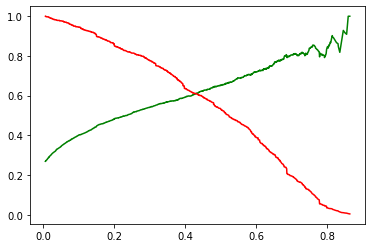

In [175]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [176]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [184]:
col=X_train_rfe.columns

In [185]:
X_test = X_test[col]
X_test.head()

,tenure,PaperlessBilling,SeniorCitizen,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
942,-0.347623,1,0,0,0,1,0,1,0,0,0,1
3730,0.999203,1,0,0,0,1,0,1,0,0,1,1
1761,1.040015,1,0,0,1,1,0,0,1,0,0,0
2283,-1.286319,1,0,0,0,0,1,1,0,0,0,0
1872,0.346196,0,0,0,1,0,0,0,1,0,0,0


In [186]:
X_test_sm = sm.add_constant(X_test)

In [187]:
y_test_pred = res.predict(X_test_sm)

In [190]:
y_test_pred[:10]

942     0.449353
3730    0.254817
1761    0.007756
2283    0.609418
1872    0.014900
1970    0.712136
2532    0.315777
1616    0.009788
2485    0.574973
5914    0.151332
dtype: float64

In [191]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [192]:
# Let's see the head
y_pred_1.head()

,0
942,0.449353
3730,0.254817
1761,0.007756
2283,0.609418
1872,0.014900


In [193]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [194]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [195]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [196]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [197]:
y_pred_final.head()

,Churn,CustID,0
0,0,942,0.449353
1,1,3730,0.254817
2,0,1761,0.007756
3,1,2283,0.609418
4,0,1872,0.014900


In [198]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [199]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Churn,CustID,Churn_Prob
0,0,942,0.449353
1,1,3730,0.254817
2,0,1761,0.007756
3,1,2283,0.609418
4,0,1872,0.014900


In [200]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [201]:
y_pred_final.head()

,Churn,CustID,Churn_Prob,final_predicted
0,0,942,0.449353,1
1,1,3730,0.254817,0
2,0,1761,0.007756,0
3,1,2283,0.609418,1
4,0,1872,0.014900,0


In [202]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7815165876777251

In [203]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1286,  242],
       [ 219,  363]], dtype=int64)

In [204]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [205]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6237113402061856

In [206]:
# Let us calculate specificity
TN / float(TN+FP)

0.8416230366492147

## Using Decision Trees

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [208]:
X_train.shape, X_test.shape

((4922, 23), (2110, 23))

In [209]:
from sklearn.tree import DecisionTreeClassifier

In [210]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [211]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [212]:
y_train_pred = dt_base.predict(X_train)
y_test_pred = dt_base.predict(X_test)

In [213]:
from sklearn.metrics import classification_report

In [214]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      1528
           1       0.62      0.43      0.51       582

    accuracy                           0.77      2110
   macro avg       0.71      0.67      0.68      2110
weighted avg       0.75      0.77      0.76      2110



In [215]:
from sklearn.metrics import plot_roc_curve

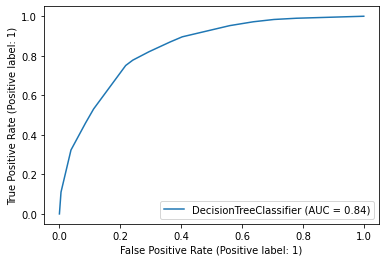

In [216]:
plot_roc_curve(dt_base, X_train, y_train, drop_intermediate=False)
plt.show()

#### Hyper-parameter tuning for the Decision Tree

In [217]:
from sklearn.model_selection import GridSearchCV

In [218]:
dt = DecisionTreeClassifier(random_state=42)

In [220]:


params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [221]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [222]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Wall time: 3.13 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [223]:
grid_search.best_score_

0.7962209321524572

In [224]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, random_state=42)

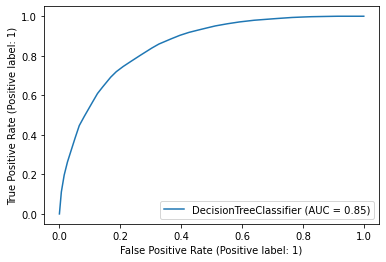

In [225]:
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

## Using Random Forest

In [226]:
from sklearn.ensemble import RandomForestClassifier

In [227]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [228]:
%%time
rf.fit(X_train, y_train)

Wall time: 37 ms


RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [229]:
rf.oob_score_

0.7929703372612759

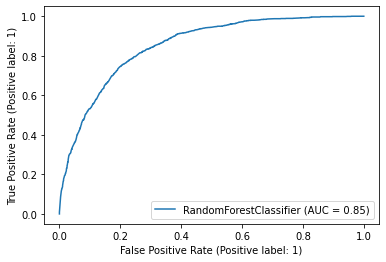

In [230]:
plot_roc_curve(rf, X_train, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [231]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [232]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [233]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [234]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 12.3 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [235]:
grid_search.best_score_

0.8063807268860665

In [236]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

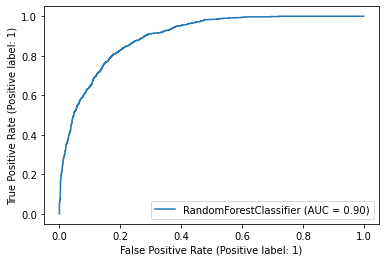

In [237]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [238]:
rf_best.feature_importances_

array([0.20264015, 0.00496015, 0.02043488, 0.11948424, 0.14331999,
       0.02890932, 0.00971377, 0.00818191, 0.037874  , 0.08616295,
       0.00634401, 0.07816047, 0.00815312, 0.00953141, 0.1088571 ,
       0.03307484, 0.01051643, 0.01967891, 0.0108357 , 0.00851517,
       0.02505767, 0.01031921, 0.0092746 ])

In [239]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [240]:
imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
0,tenure,0.202640
4,TotalCharges,0.143320
3,MonthlyCharges,0.119484
14,InternetService_Fiber optic,0.108857
9,Contract_Two year,0.086163
11,PaymentMethod_Electronic check,0.078160
8,Contract_One year,0.037874
15,InternetService_No,0.033075
5,SeniorCitizen,0.028909
20,TechSupport_Yes,0.025058
